In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [4]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [36]:
from turtle import color


def plot_box(dfs, metrics):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    for i in [0,1]:
        axs[i].boxplot(dfs[i].values)
        axs[i].set_xticklabels(dfs[i].columns)
        axs[i].set_title(f'{metrics[i]}')
        axs[i].set_xlabel('Modelos')
        axs[i].set_ylabel('Acurácia')

    fig.suptitle('Boxplots Acurácia (10-Fold SCV)')
    fig.tight_layout()

    plt.show()

def plot_cms(cm_list, models_name):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    # Confusion Matrix
    for idx in range(6):
        cm_mean = np.mean(cm_list[idx], axis=0)
        axs[idx//3, idx%3] = sns.heatmap(cm_mean, linewidths=0.5, annot=True, fmt='g', ax=axs[idx//3, idx%3], cmap = sns.cm.rocket_r)
        axs[idx//3, idx%3].set_yticklabels(axs[idx//3, idx%3].get_yticklabels(), rotation=0)
        axs[idx//3, idx%3].set_title(f'{models_name[idx]}')
        axs[idx//3, idx%3].set_xlabel('Classes preditas')
        axs[idx//3, idx%3].set_ylabel('Classes verdadeiras')

    fig.suptitle('Matrizes de Confusão Média (10-Fold SCV)')
    fig.tight_layout()
    
    plt.show()

def plot_comparison(df, pp1, pp2, error=None):
    fig, ax = plt.subplots()
    sns.scatterplot(x=df.loc[pp1], 
                    y=df.loc[pp2], 
                    hue=df.columns, ax=ax)
    if error is not None:
        ax.errorbar(x=df.loc[pp1],
                     y=df.loc[pp2],
                     xerr=error[pp1],
                     yerr=error[pp2],
                     elinewidth=0.5,
                     fmt='none',
                     marker='o',
                     capsize=2,
                     capthick=0.5
                     )
    
    ax.plot([0.7, 1], [0.7, 1], 'k--', lw=1)
    ax.set_title('Acurácia média 10-Fold SCV')
    ax.set_xlabel(pp1)
    ax.set_ylabel(pp2)
    ax.set_box_aspect(1)

# Loading...

In [52]:
#DT
dt = load_metrics('dt')
dt_enc = load_metrics('dt_enc')
dt_pca = load_metrics('dt_pca')
dt_fs = load_metrics('dt_fs')
dt_pca_scaled = load_metrics('dt_pca_scaled')
dt_scaled = load_metrics('dt_scaled')
dt_fs_scaled = load_metrics('dt_fs_scaled')

# GNB
gnb = load_metrics('gnb')
gnb_enc = load_metrics('gnb_enc')
gnb_pca = load_metrics('gnb_pca')
gnb_fs = load_metrics('gnb_fs')
gnb_pca_scaled = load_metrics('gnb_pca_scaled')
gnb_scaled = load_metrics('gnb_scaled')
gnb_fs_scaled = load_metrics('gnb_fs_scaled')

#MNB
mnb = load_metrics('mnb')
mnb_enc = load_metrics('mnb_enc')
mnb_fs = load_metrics('mnb_fs')
mnb_pca_scaled = load_metrics('mnb_pca_scaled')
mnb_scaled = load_metrics('mnb_scaled')
mnb_fs_scaled = load_metrics('mnb_fs_scaled')

#KNN
knn = load_metrics('knn')
knn_enc = load_metrics('knn_enc')
knn_pca = load_metrics('knn_pca')
knn_fs = load_metrics('knn_fs')
knn_pca_scaled = load_metrics('knn_pca_scaled')
knn_scaled = load_metrics('knn_scaled')
knn_fs_scaled = load_metrics('knn_fs_scaled')

#SVC
svc = load_metrics('svc')
svc_enc = load_metrics('svc_enc')
svc_pca = load_metrics('svc_pca')
svc_fs = load_metrics('svc_fs')
svc_pca_scaled = load_metrics('svc_pca_scaled')
svc_scaled = load_metrics('svc_scaled')
svc_fs_scaled = load_metrics('svc_fs_scaled')

#MLP
mlp = load_metrics('mlp')
mlp_enc = load_metrics('mlp_enc')
mlp_pca = load_metrics('mlp_pca')
mlp_pca_scaled = load_metrics('mlp_pca_scaled')
mlp_scaled = load_metrics('mlp_scaled')
mlp_fs = load_metrics('mlp_fs')
mlp_fs_scaled = load_metrics('mlp_fs_scaled')

# Análise dos Modelos

In [53]:
df_f1 = pd.DataFrame({
    'DT': [dt[1].mean(), dt_scaled[1].mean(), dt_pca[1].mean(), dt_pca_scaled[1].mean(), dt_fs[1].mean(), dt_fs_scaled[1].mean(), dt_enc[1].mean()],
    'GNB': [gnb[1].mean(), gnb_scaled[1].mean(), gnb_pca[1].mean(), gnb_pca_scaled[1].mean(), gnb_fs[1].mean(), gnb_fs_scaled[1].mean(), gnb_enc[1].mean()],
    'MNB': [mnb[1].mean(), mnb_scaled[1].mean(), np.nan, mnb_pca_scaled[1].mean(), mnb_fs[1].mean(), mnb_fs_scaled[1].mean(), mnb_enc[1].mean()],
    'KNN': [knn[1].mean(), knn_scaled[1].mean(), knn_pca[1].mean(), knn_pca_scaled[1].mean(), knn_fs[1].mean(), knn_fs_scaled[1].mean(), knn_enc[1].mean()],
    'SVC': [svc[1].mean(), svc_scaled[1].mean(), svc_pca[1].mean(), svc_pca_scaled[1].mean(), svc_fs[1].mean(), svc_fs_scaled[1].mean(), svc_enc[1].mean()],
    'MLP': [mlp[1].mean(), mlp_scaled[1].mean(), mlp_pca[1].mean(), mlp_pca_scaled[1].mean(), mlp_fs[1].mean(), mlp_fs_scaled[1].mean(), mlp_enc[1].mean()],
}, index=['Original', 'Padronizado', 'PCA', 'PCA Padronizado', 'Limiar de Variância', 'Limiar de Variância Padronizado', 'AutoEncoder'])

In [54]:
df_f1

,DT,GNB,MNB,KNN,SVC,MLP
Original,0.747712,0.810691,0.834784,0.928610,0.947090,0.924943
Padronizado,0.741053,0.670828,0.833377,0.885968,0.929987,0.933805
PCA,0.733990,0.834226,NaN,0.933655,0.950175,0.920501
PCA Padronizado,0.722533,0.401950,0.854245,0.908872,0.931509,0.938139
Limiar de Variância,0.745736,0.810691,0.834784,0.928610,0.947090,0.921019
Limiar de Variância Padronizado,0.751736,0.670828,0.816703,0.885968,0.929987,0.937410
AutoEncoder,0.601426,0.803164,0.778510,0.919275,0.939215,0.914615


In [55]:
df_acc = pd.DataFrame({
    'DT': [dt[0].mean(), dt_scaled[0].mean(), dt_pca[0].mean(), dt_pca_scaled[0].mean(), dt_fs[0].mean(), dt_fs_scaled[0].mean(), dt_enc[0].mean()],
    'GNB': [gnb[0].mean(), gnb_scaled[0].mean(), gnb_pca[0].mean(), gnb_pca_scaled[0].mean(), gnb_fs[0].mean(), gnb_fs_scaled[0].mean(), gnb_enc[0].mean()],
    'MNB': [mnb[0].mean(), mnb_scaled[0].mean(), mnb_pca_scaled[0].mean(), mnb_pca_scaled[0].mean(), mnb_fs[0].mean(), mnb_fs_scaled[0].mean(), mnb_enc[0].mean()],
    'KNN': [knn[0].mean(), knn_scaled[0].mean(), knn_pca[0].mean(), knn_pca_scaled[0].mean(), knn_fs[0].mean(), knn_fs_scaled[0].mean(), knn_enc[0].mean()],
    'SVC': [svc[0].mean(), svc_scaled[0].mean(), svc_pca[0].mean(), svc_pca_scaled[0].mean(), svc_fs[0].mean(), svc_fs_scaled[0].mean(), svc_enc[0].mean()],
    'MLP': [mlp[0].mean(), mlp_scaled[0].mean(), mlp_pca[0].mean(), mlp_pca_scaled[0].mean(), mlp_fs[0].mean(), mlp_fs_scaled[0].mean(), mlp_enc[0].mean()],
}, index=['Original', 'Padronizado', 'PCA', 'PCA Padronizado', 'Limiar de Variância', 'Limiar de Variância Padronizado', 'AutoEncoder'])

In [56]:

df_acc_std = pd.DataFrame({
    'DT': [dt[0].std(), dt_scaled[0].std(), dt_pca[0].std(), dt_pca_scaled[0].std(), dt_fs[0].std(), dt_fs_scaled[0].std(), dt_enc[0].std()],
    'GNB': [gnb[0].std(), gnb_scaled[0].std(), gnb_pca[0].std(), gnb_pca_scaled[0].std(), gnb_fs[0].std(), gnb_fs_scaled[0].std(), gnb_enc[0].std()],
    'MNB': [mnb[0].std(), mnb_scaled[0].std(), mnb_pca_scaled[0].std(), mnb_pca_scaled[0].std(), mnb_fs[0].std(), mnb_fs_scaled[0].std(), mnb_enc[0].std()],
    'KNN': [knn[0].std(), knn_scaled[0].std(), knn_pca[0].std(), knn_pca_scaled[0].std(), knn_fs[0].std(), knn_fs_scaled[0].std(), knn_enc[0].std()],
    'SVC': [svc[0].std(), svc_scaled[0].std(), svc_pca[0].std(), svc_pca_scaled[0].std(), svc_fs[0].std(), svc_fs_scaled[0].std(), svc_enc[0].std()],
    'MLP': [mlp[0].std(), mlp_scaled[0].std(), mlp_pca[0].std(), mlp_pca_scaled[0].std(), mlp_fs[0].std(), mlp_fs_scaled[0].std(), mlp_enc[0].std()],
}, index=['Original', 'Padronizado', 'PCA', 'PCA Padronizado', 'Limiar de Variância', 'Limiar de Variância Padronizado', 'AutoEncoder'])

In [61]:
df_acc_std.round(3)

,DT,GNB,MNB,KNN,SVC,MLP
Original,0.019,0.015,0.016,0.013,0.007,0.013
Padronizado,0.029,0.015,0.015,0.016,0.011,0.013
PCA,0.024,0.016,0.025,0.016,0.007,0.010
PCA Padronizado,0.028,0.035,0.025,0.012,0.009,0.008
Limiar de Variância,0.028,0.015,0.016,0.013,0.007,0.008
Limiar de Variância Padronizado,0.028,0.015,0.024,0.016,0.011,0.013
AutoEncoder,0.026,0.023,0.026,0.014,0.010,0.017


In [64]:
df_acc.round(3)

,DT,GNB,MNB,KNN,SVC,MLP
Original,0.748,0.811,0.834,0.929,0.947,0.925
Padronizado,0.742,0.680,0.832,0.887,0.930,0.934
PCA,0.734,0.834,0.854,0.934,0.950,0.921
PCA Padronizado,0.723,0.441,0.854,0.909,0.932,0.938
Limiar de Variância,0.746,0.811,0.834,0.929,0.947,0.922
Limiar de Variância Padronizado,0.753,0.680,0.816,0.887,0.930,0.938
AutoEncoder,0.603,0.804,0.779,0.920,0.939,0.915


# Plots

/tmp/ipykernel_31897/2100473310.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


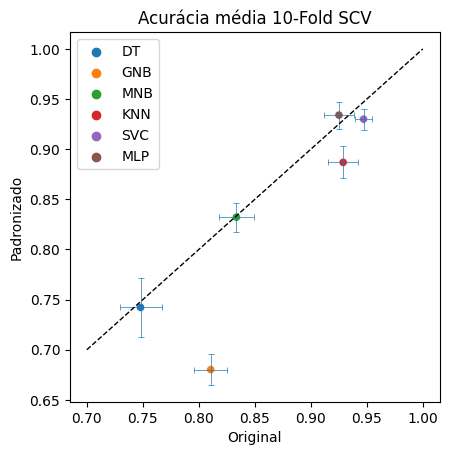

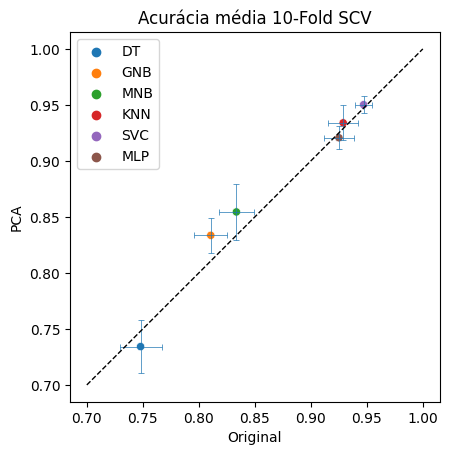

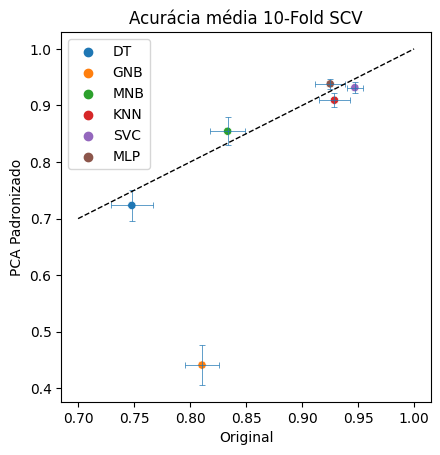

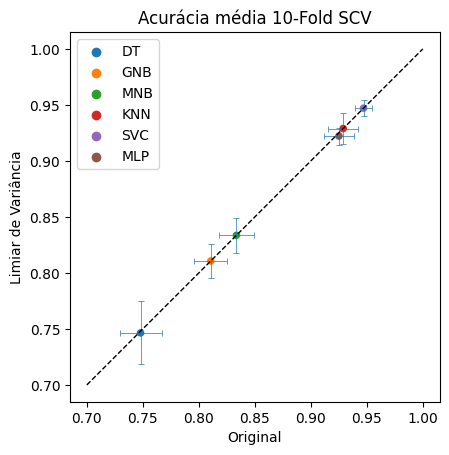

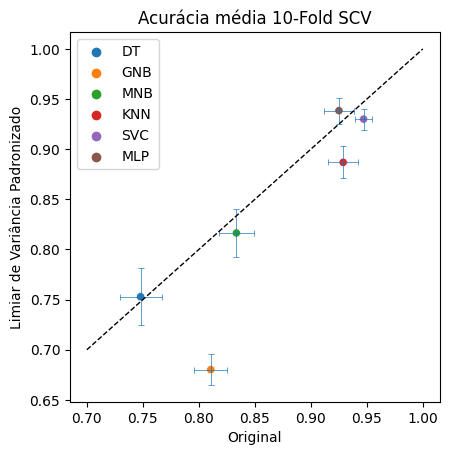

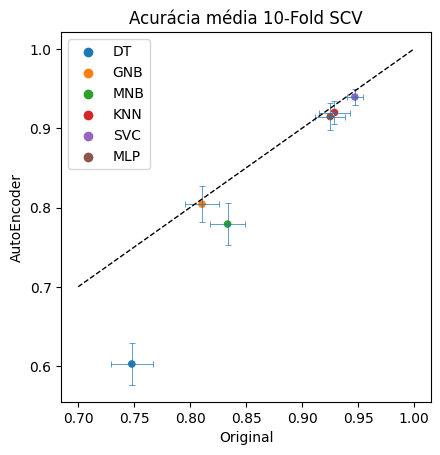

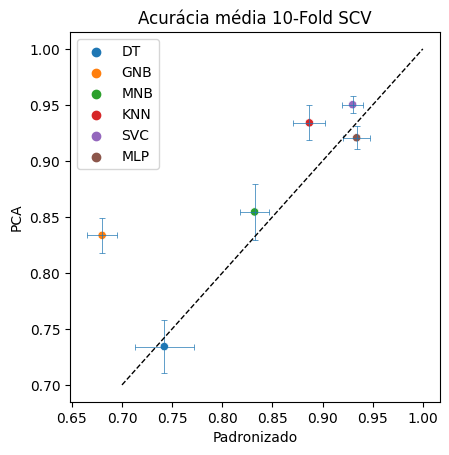

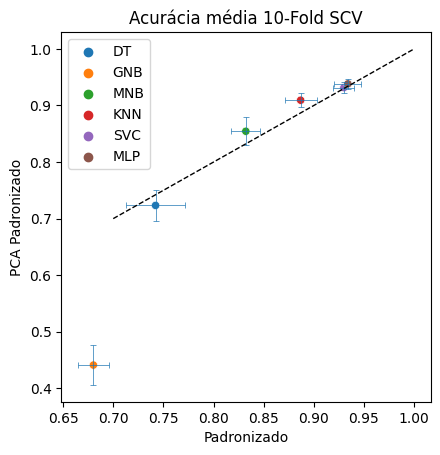

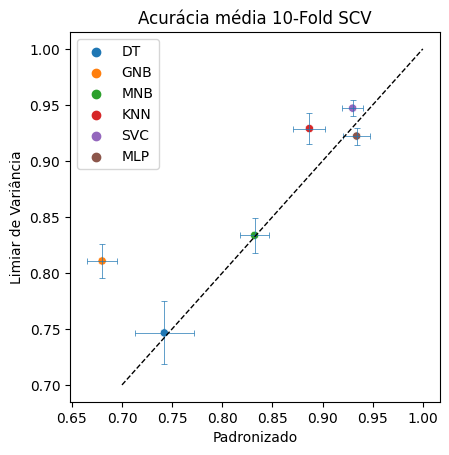

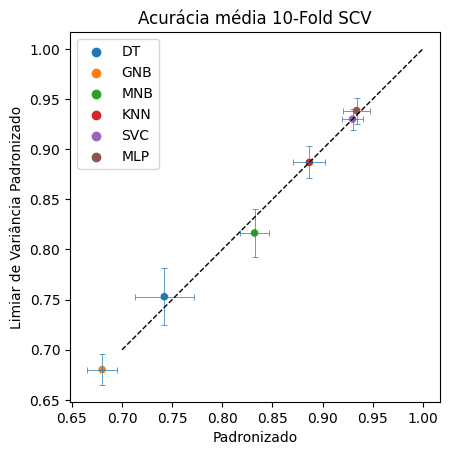

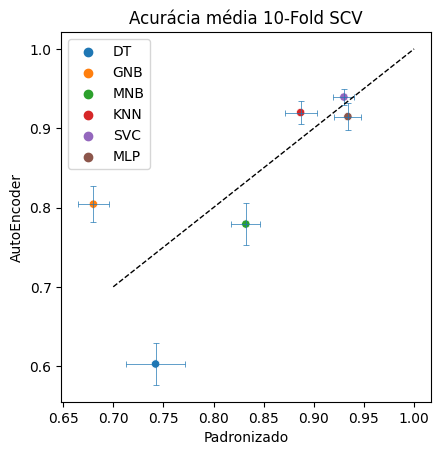

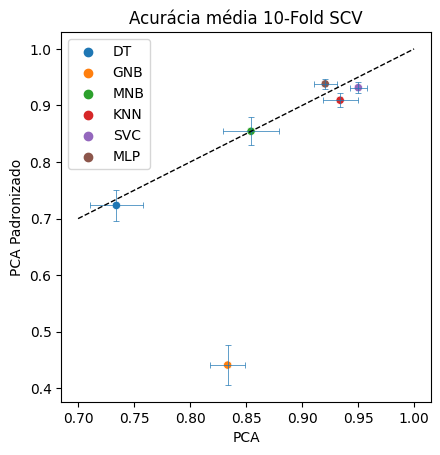

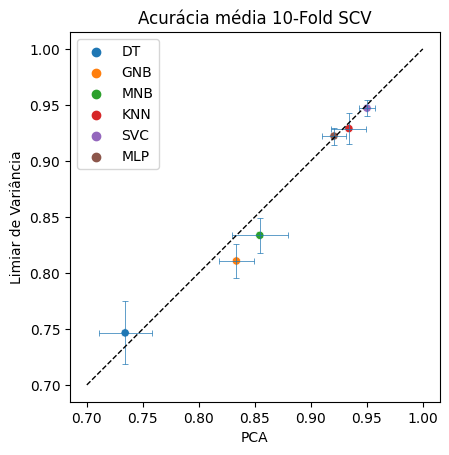

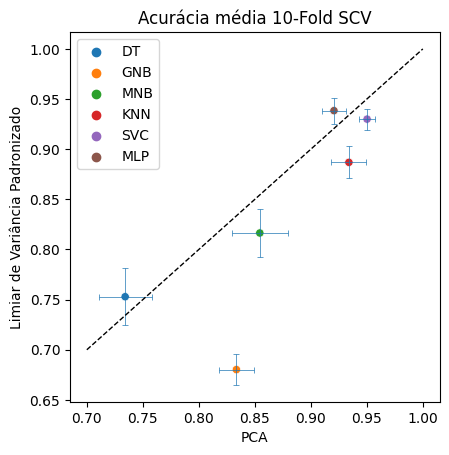

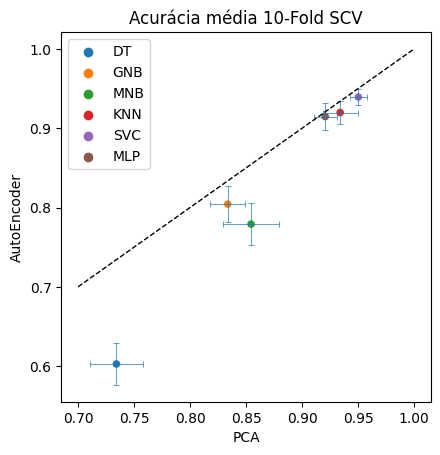

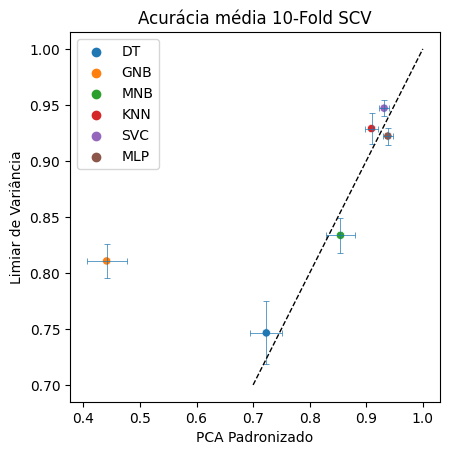

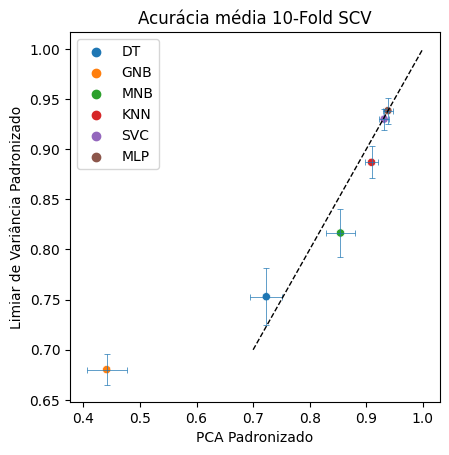

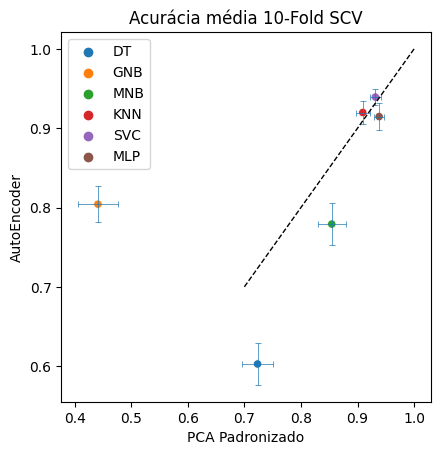

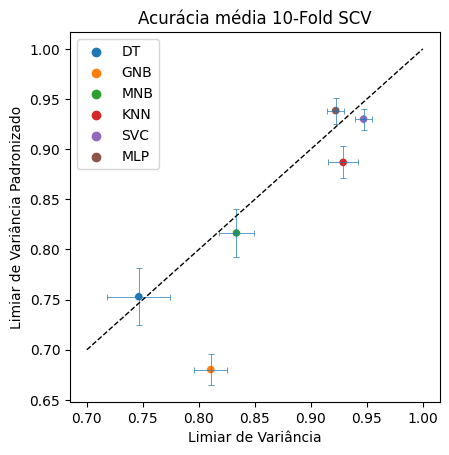

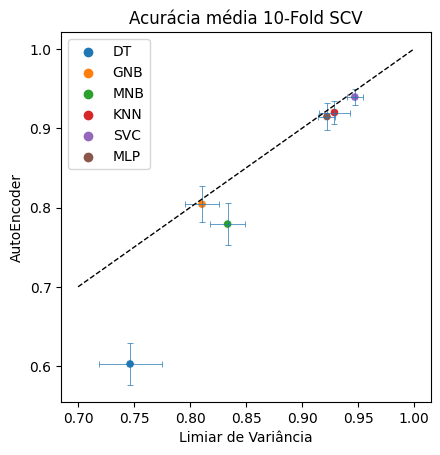

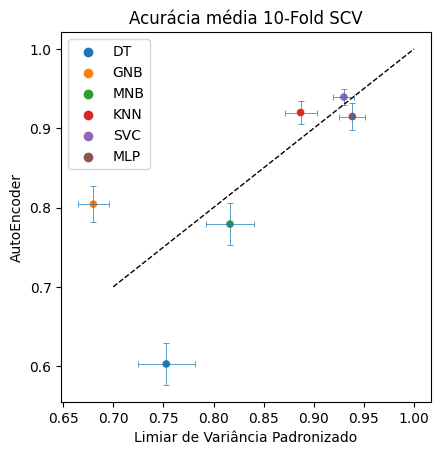

In [59]:
from itertools import combinations

preps = combinations(df_acc.index, 2)

for p in preps:
    plot_comparison(df_acc, p[0], p[1], error={p[0]: df_acc_std.loc[p[0]], p[1]: df_acc_std.loc[p[1]]})

# CMS e ROCs


### modelos originais


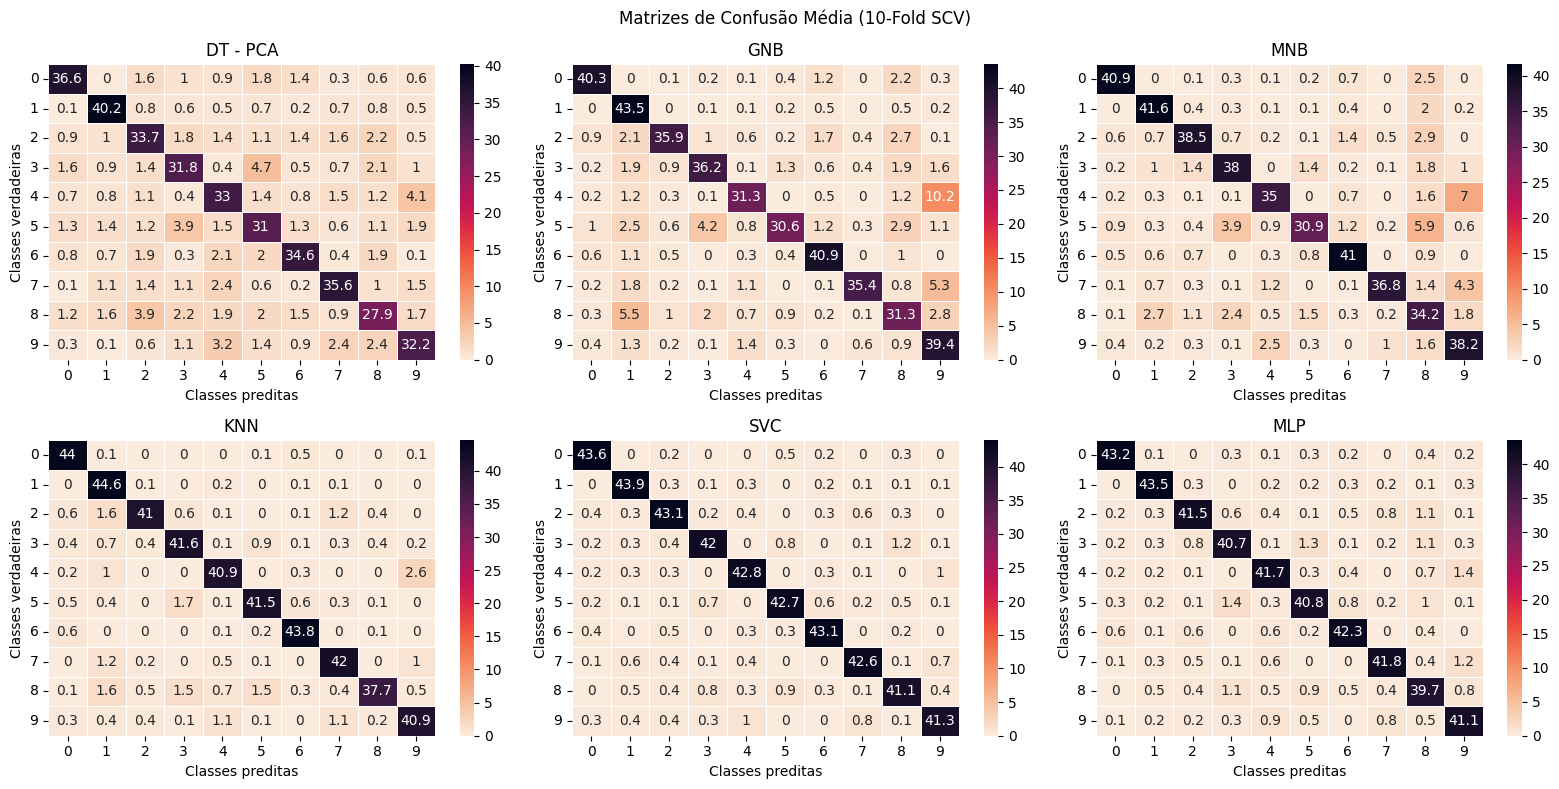

In [51]:
model_names = ['DT', 'GNB', 'MNB', 'KNN', 'SVC', 'MLP']

plot_cms([dt[2], gnb[2], mnb[2], knn[2], svc[2], mlp[2]], model_names)

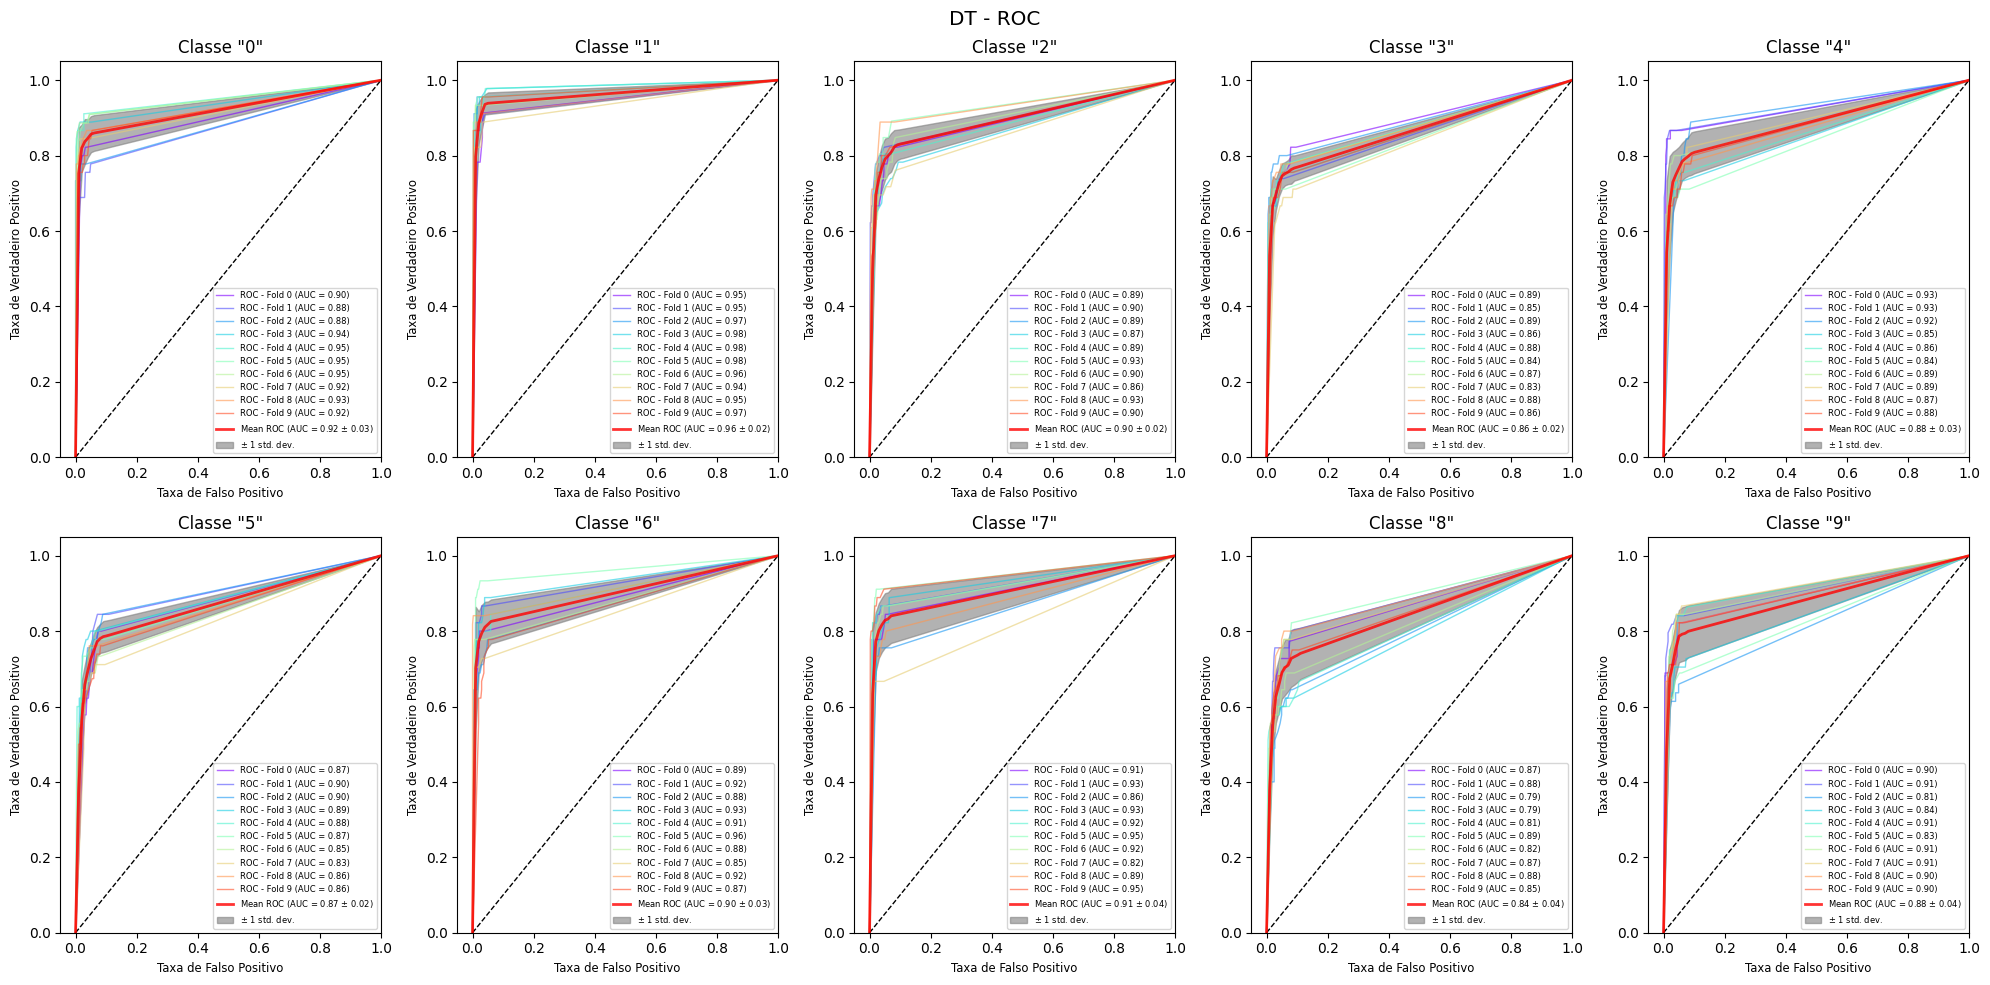

In [49]:
from utils.metrics import Results


Results('DT', dt[0], dt[1], dt[2], dt[3], '').plot_roc()

